<a href="https://colab.research.google.com/github/maxvell07/TelecomLabs/blob/main/lab11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Проведём импорт необходимых библиотек и файлов:

In [1]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

--2024-05-20 20:43:22--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2024-05-20 20:43:22--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48574 (47K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.44K  --.-KB/s    in 0.001s  

2024-05-20 20:43:23 (34.8 MB/s) - ‘thinkdsp.py’ saved [48574/48574]



# Упражнение 11.1
Код для этой главы содержится в блокноте chap11.ipynb. Изучите его и прослушайте примеры.

# Упражнение 11.2
Крис «Монти» Монтгомери (Chris "Monty" Montgomery) сделал отличное видео под названием «D/A and A/D | Digital Show and Tell». Он демонстрирует теорему о выборках в действии, и предоставляет множество другой замечательной информации о выборках. См. видеоролик https://www.youtube.com/watch?v=cIQ9IXSUzuM.

# Упражнение 11.3
Выше показано, что при взятии выборок из сигнала при слишком низкой чистоте кадров составляющие, большие частоты заворота дадут биения. В таком случаее эти компоненты не отфильтруешь, посколько они неотличимы от более низких частот.

Полезно отфильтровать эти частоты до выборки: фильтр НЧ, используемый для этой цели, называется фильтром сглаживания.

Вернитесь к примеру "Соло на барабане", примените фильтр НЧ до выборки, а затем, опять с помощью фильтра НЧ, удалите спектральные копии, вызванные выборкой. Результат должен быть идентицент отфильтрованному сигналу.

Выполним действия по порядку:

In [2]:
if not os.path.exists('263868__kevcio__amen-break-a-160-bpm.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/263868__kevcio__amen-break-a-160-bpm.wav

--2024-05-20 20:43:33--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/263868__kevcio__amen-break-a-160-bpm.wav
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/263868__kevcio__amen-break-a-160-bpm.wav [following]
--2024-05-20 20:43:33--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/263868__kevcio__amen-break-a-160-bpm.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1058544 (1.0M) [audio/wav]
Saving to: ‘263868__kevcio__amen-break-a-160-bpm.wav’

263868__kevcio__ame 100%[===================>]   1.01M  --.-KB/s    in 0.01s   

20

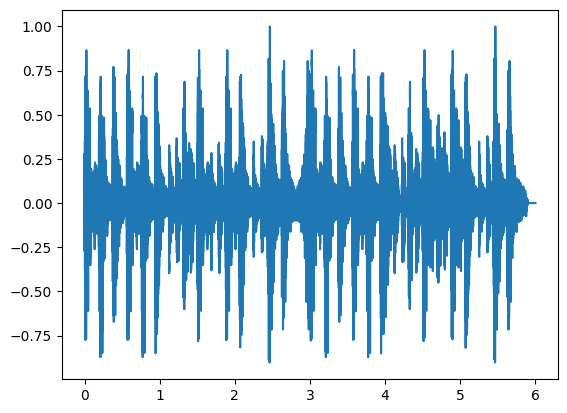

In [3]:
from thinkdsp import read_wave

wave = read_wave('263868__kevcio__amen-break-a-160-bpm.wav')
wave.plot()

In [4]:
wave.framerate

44100

In [5]:
wave.make_audio()

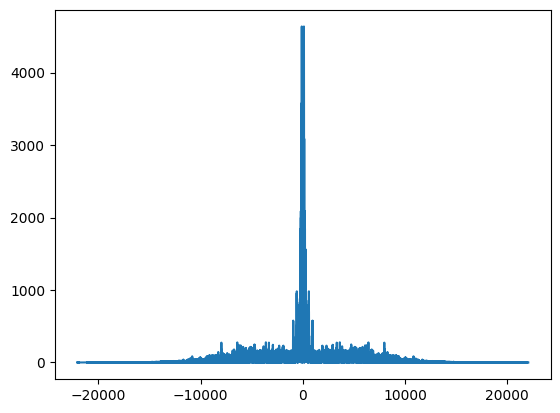

In [6]:
spectrum = wave.make_spectrum(full=True)
spectrum.plot()

Фильтр НЧ:

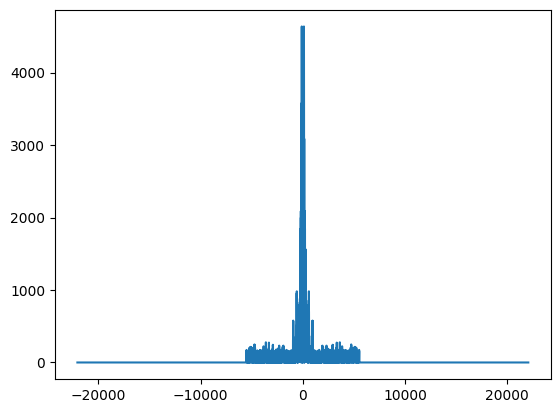

In [10]:
factor = 4
framerate = wave.framerate / factor
cutoff = framerate / 2 - 1
spectrum.low_pass(cutoff)
spectrum.plot()

In [11]:
filtered = spectrum.make_wave()
filtered.make_audio()

In [12]:
from thinkdsp import Wave

def sample(wave, factor):
    ys = np.zeros(len(wave))
    ys[::factor] = wave.ys[::factor]
    return Wave(ys, framerate=wave.framerate)

In [13]:
sampled = sample(filtered, factor)
sampled.make_audio()

<ipython-input-12-ebe621777ca9>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  ys[::factor] = wave.ys[::factor]


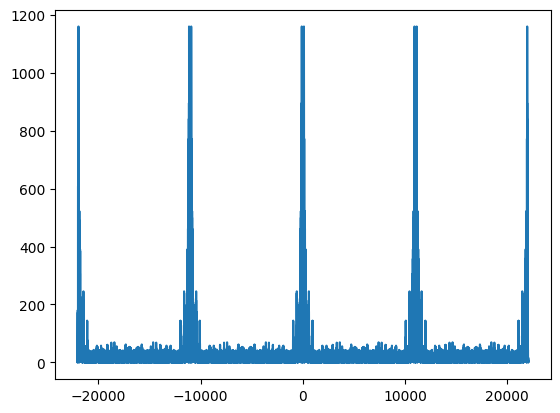

In [14]:
sampled_spectrum = sampled.make_spectrum(full=True)
sampled_spectrum.plot()

Удалили спектральные копии:

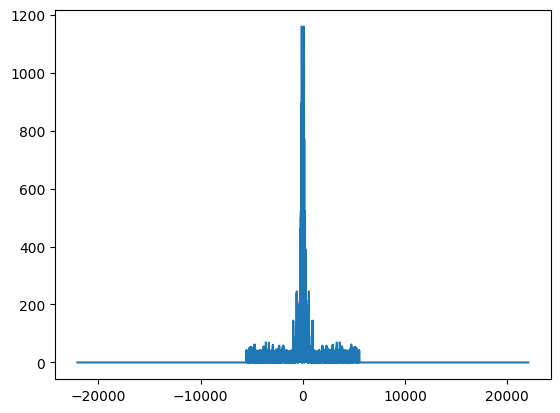

In [15]:
sampled_spectrum.low_pass(cutoff)
sampled_spectrum.plot()

In [16]:
interpolated = sampled_spectrum.make_wave()
interpolated.make_audio()

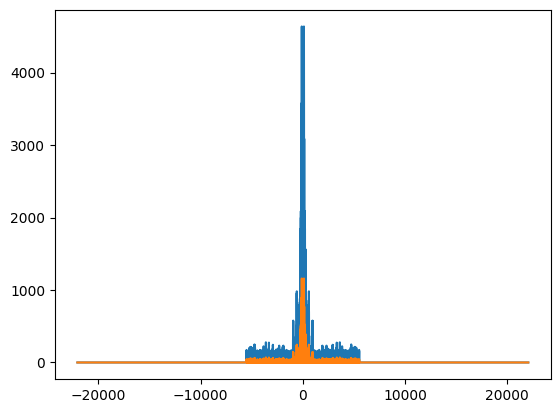

In [17]:
spectrum.plot()
sampled_spectrum.plot()

Видно, что звуки отличны. Попробуем увеличить амплитуду в 3 раза:

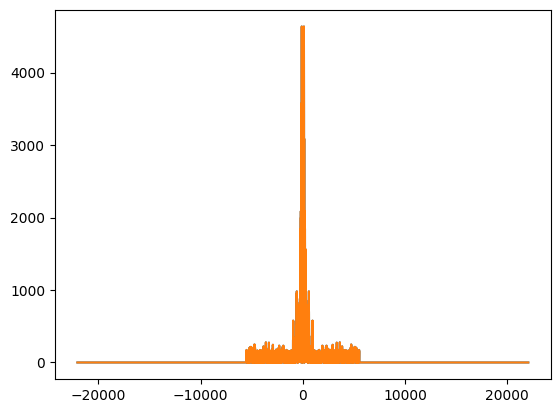

In [18]:
sampled_spectrum.scale(factor)
sampled_spectrum.plot()
spectrum.plot()

Теперь звуки действительно неотличимы.